## Car Price Prediction - Assignment Solution
The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [86]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [87]:
#Summary of the dataset
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [88]:
# Checking for Null Value and the
houses.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [89]:
print(houses.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

### Data Exploration

#### A) Numeric Types

In [90]:
# all numeric (float and int) variables in the dataset
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Following are the observations -
- MSSubClass is numeric but is categorical 
- OverallQual is ordinal hence we'll treat it as categorical
- OverallCond is ordinal hence we'll treat it as categorical
- No need of Id

In [91]:
# Dropping the above ones
houses_numeric = houses_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'Id'], axis=1)
houses_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


##### Let's make a pair-plot for the numeric types

In [92]:
#sns.pairplot(houses_numeric)
#plt.show()

#### The plot is too congested to observe any sort of pattern. Next let's plot a heatmap

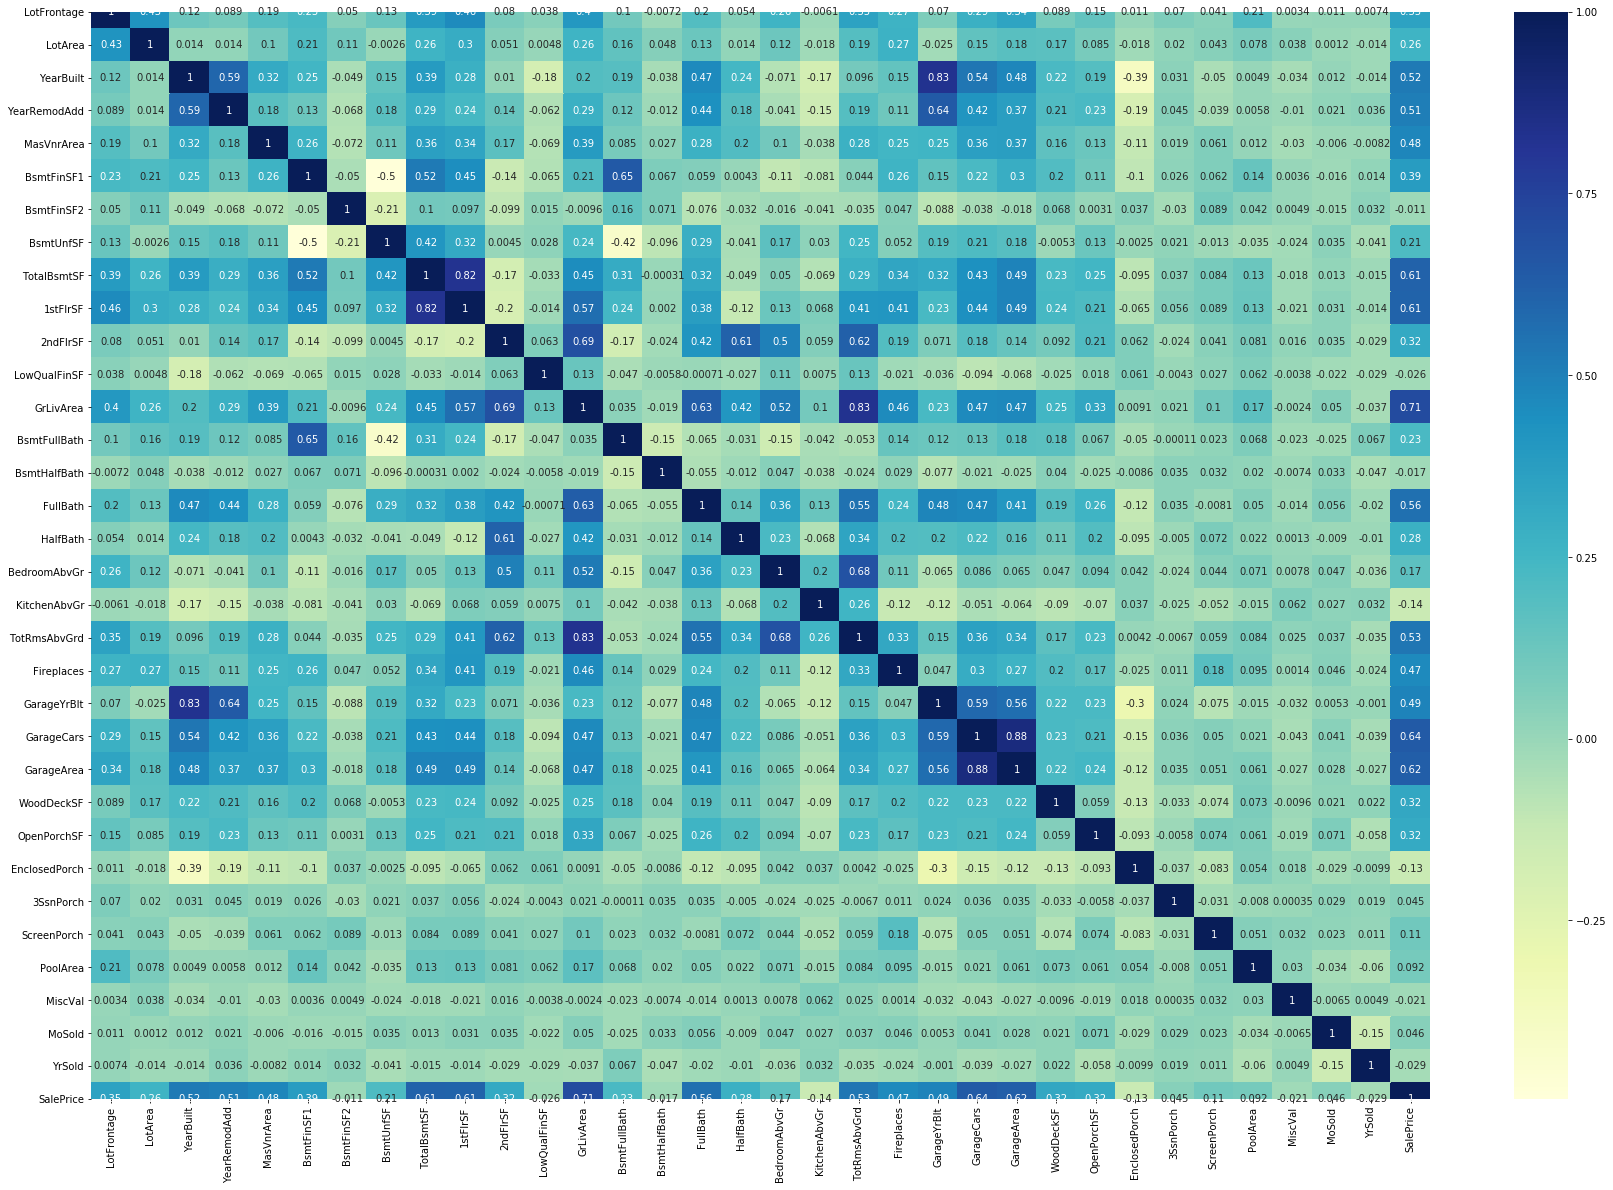

In [93]:
cor = houses_numeric.corr()
# plotting correlations on a heatmap
# heatmap
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:
- Sales Price is positively co-related with GarageArea, GarageCars, TotRmsAbvGrd, Fireplaces, GarageYrBlt, FullBath, GrLivArea, 1stFlrSf, TotalBsmtSF, YearBuilt, YearRemodAdd
- Sales Price is negatively co-related with EnclosedPorch, KitchenAbvGr
- Since the occurence of deep blue except the diagonal is less; few of the independent variables are co-related with each other; Multicolinearity

#### B) Categorical Type

In [94]:
#Subsetting the categorical types
houses_cat = houses.select_dtypes(include=['object'])
print(len(list(houses_cat.columns.values)))

43


## Data Cleaning

Dropping all the columns of the numeric type having >=50% of null values

In [95]:
houses_numeric = houses_numeric.loc[:, houses_numeric.isin(['NA']).mean() < .5]

In [96]:
houses_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


#### Imputing the null values with the median for the numeric vars

In [97]:
houses_numeric = houses_numeric.fillna(houses_numeric.median())
#Replacing the year values with it's age
houses_numeric['YearBuilt']=houses_numeric['YearBuilt'].apply(lambda x: int(2020-x))
houses_numeric['YearRemodAdd']=houses_numeric['YearRemodAdd'].apply(lambda x: int(2020-x))
houses_numeric['GarageYrBlt']=houses_numeric['GarageYrBlt'].apply(lambda x: int(2020-x))

In [98]:
houses_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
W

## Data Preparation

#### Will convert the previously dropped numerical vars into categorical - 'MSSubClass', 'OverallQual', 'OverallCond'

In [99]:
houses['MSSubClass'] = houses['MSSubClass'].astype('object')
houses['OverallQual'] = houses['OverallQual'].astype('object')
houses['OverallCond'] = houses['OverallCond'].astype('object')
#adding the above three to categorical type df
houses_cat = houses.select_dtypes(include=['object'])

#### Would need to encode the Ordinal variables and nominal variables separately

In [100]:
list_nominal=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
              'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 
              'PavedDrive', 'SaleType', 'SaleCondition', 'MiscFeature']

list_ordinal=['OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
              'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 
              'Fence']

#### Creating dummies for the nominal features

In [101]:
#Encoding nominal ones
house_dummies_nominal= pd.get_dummies(houses_cat[list_nominal], drop_first=True, dummy_na=True) 
house_dummies_nominal.head()

,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


#### Vars of ordinal in nature would be encoded using the built in class of scikit learn


#### The NAs of the ordinal ones has business meaning so can't be imputed or dropped

In [102]:
#Encoding ordinal ones
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
#Changing the data-types to 'str' to incorporate the NAs
houses_cat[list_ordinal] = houses_cat[list_ordinal].astype(str)
# transform data
house_dummies_ordinal = encoder.fit_transform(houses_cat[list_ordinal])

In [103]:
#Converting numpy array to pandas df
house_dummies_ordinal=pd.DataFrame(data=house_dummies_ordinal, columns=list_ordinal)

In [104]:
house_dummies_ordinal.head()

,OverallQual,OverallCond,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
0,7.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,5.0,4.0,4.0,3.0,4.0
1,6.0,7.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,0.0,3.0,4.0,4.0,4.0,3.0,4.0
2,7.0,4.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,0.0,2.0,4.0,4.0,4.0,3.0,4.0
3,7.0,4.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0
4,8.0,4.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,0.0,2.0,4.0,4.0,4.0,3.0,4.0


#### Will prepare the final_df

In [105]:
#Conactenating to form the final df
final_df = pd.concat([houses_numeric, house_dummies_nominal, house_dummies_ordinal], axis=1)

In [106]:
#converting the price to log scale
final_df['SalePrice']=np.log(final_df['SalePrice'])
#print(final_df['SalePrice'])

In [107]:
final_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
0,65.0,8450,17,17,196.0,706,0,150,856,856,...,3.0,2.0,5.0,0.0,2.0,5.0,4.0,4.0,3.0,4.0
1,80.0,9600,44,44,0.0,978,0,284,1262,1262,...,1.0,0.0,5.0,0.0,3.0,4.0,4.0,4.0,3.0,4.0
2,68.0,11250,19,18,162.0,486,0,434,920,920,...,2.0,2.0,5.0,0.0,2.0,4.0,4.0,4.0,3.0,4.0
3,60.0,9550,105,50,0.0,216,0,540,756,961,...,3.0,0.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0
4,84.0,14260,20,20,350.0,655,0,490,1145,1145,...,0.0,2.0,5.0,0.0,2.0,4.0,4.0,4.0,3.0,4.0


In [108]:
#Dividing the data set into dependent and independent vars
y=final_df.pop('SalePrice')
X=final_df
print(type(X))

<class 'pandas.core.frame.DataFrame'>


## Modelling & Evaluation

### Ridge & Lasso regression

In [109]:
#Scaling the features
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence'],
      dtype='object', length=251)

#### Making the train-test split

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### Using RFE to clamp down the number of vars

In [111]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col2 = col
X_train=X_train[col]

### Ridge Regression

In [112]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005655,0.001723,0.001738,0.000413,0.0001,{'alpha': 0.0001},-0.082708,-0.090818,-0.093200,-0.094456,...,-0.087419,0.007049,23,-0.073481,-0.075929,-0.073309,-0.074952,-0.075715,-0.074677,0.001098
1,0.004967,0.000634,0.001616,0.000490,0.001,{'alpha': 0.001},-0.082709,-0.090818,-0.093200,-0.094455,...,-0.087419,0.007049,22,-0.073481,-0.075929,-0.073309,-0.074953,-0.075715,-0.074677,0.001098
2,0.004600,0.001010,0.001583,0.000497,0.01,{'alpha': 0.01},-0.082709,-0.090819,-0.093198,-0.094448,...,-0.087417,0.007048,21,-0.073482,-0.075929,-0.073310,-0.074954,-0.075716,-0.074678,0.001097
3,0.004983,0.000878,0.001814,0.000745,0.05,{'alpha': 0.05},-0.082712,-0.090821,-0.093191,-0.094414,...,-0.087408,0.007043,20,-0.073486,-0.075929,-0.073315,-0.074960,-0.075721,-0.074682,0.001096
4,0.003993,0.001114,0.001799,0.000391,0.1,{'alpha': 0.1},-0.082717,-0.090825,-0.093183,-0.094372,...,-0.087397,0.007036,19,-0.073492,-0.075929,-0.073321,-0.074967,-0.075726,-0.074687,0.001095


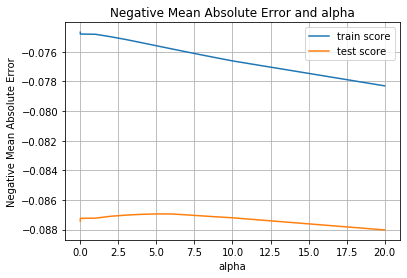

In [114]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid(which='major')
plt.show()

#### Alpha = 5 seems to be the optimal

In [115]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.86940688e-02, -6.92942530e-02, -2.80090450e-02,  4.12982837e-02,
        5.18627604e-03, -1.75478719e-03,  4.30752286e-02,  5.59963324e-02,
        5.97932265e-02,  2.54873397e-06,  9.08674511e-02, -2.65838045e-02,
        2.77669345e-02,  4.29396551e-02, -2.15022023e-02, -1.13969639e-02,
        3.98268901e-04, -2.11070080e-02, -1.95772476e-03,  0.00000000e+00,
        7.37718234e-02,  3.79517711e-02,  1.55607993e-01,  1.18056999e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.85920164e-02,
       -1.73680656e-02,  1.95848805e-02,  0.00000000e+00,  1.93709871e-02,
        0.00000000e+00, -5.89747295e-02,  0.00000000e+00, -1.92656346e-03,
        3.98268901e-04,  0.00000000e+00,  1.36532801e-02,  0.00000000e+00,
       -2.33430370e-02, -1.90698654e-02,  0.00000000e+00,  3.27055961e-01,
        7.02475392e-02,  6.81093047e-02,  6.72360093e-02,  2.09743427e-01,
        1.39067026e-01,  

In [116]:
from sklearn.metrics import r2_score
# predict on train-set
y_train_pred = ridge.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9298454700564011

#### R2 score on test-set

In [117]:
y_test_pred = ridge.predict(X_test[col]) #col is the columns selected after applying RFE
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8454162346648599

### Feature Co-efficients

In [118]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

col = col.insert(0, "constant")
sorted(list(zip(model_parameters, col)))

[(-0.069, 'YearBuilt'),
 (-0.059, 'Condition2_PosN'),
 (-0.029, 'ExterQual'),
 (-0.028, 'YearRemodAdd'),
 (-0.027, 'KitchenAbvGr'),
 (-0.026, 'BsmtQual'),
 (-0.023, 'RoofStyle_Gable'),
 (-0.022, 'MSSubClass_30.0'),
 (-0.021, 'MSSubClass_160.0'),
 (-0.019, 'RoofStyle_Hip'),
 (-0.017, 'Neighborhood_MeadowV'),
 (-0.011, 'MSSubClass_75.0'),
 (-0.009, 'Foundation_CBlock'),
 (-0.005, 'Foundation_Wood'),
 (-0.002, 'BldgType_2fmCon'),
 (-0.002, 'BsmtUnfSF'),
 (-0.002, 'MSSubClass_190.0'),
 (-0.001, 'Exterior1st_AsphShn'),
 (0.0, 'BldgType_Duplex'),
 (0.0, 'BldgType_nan'),
 (0.0, 'Condition1_nan'),
 (0.0, 'Condition2_nan'),
 (-0.0, 'Exterior2nd_AsphShn'),
 (-0.0, 'Foundation_Slab'),
 (0.0, 'HouseStyle_nan'),
 (0.0, 'LandContour_nan'),
 (0.0, 'LandSlope_nan'),
 (0.0, 'LotConfig_nan'),
 (0.0, 'LotShape_nan'),
 (0.0, 'LowQualFinSF'),
 (0.0, 'MSSubClass_90.0'),
 (0.0, 'MSSubClass_nan'),
 (0.0, 'MSZoning_nan'),
 (0.0, 'Neighborhood_nan'),
 (0.0, 'RoofStyle_nan'),
 (0.0, 'Street_nan'),
 (0.0, 'Utilit

### Lasso Regression

In [119]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [120]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041597,0.003282,0.001395,0.000490,0.0001,{'alpha': 0.0001},-0.082728,-0.090965,-0.093115,-0.094180,...,-0.087366,0.007015,2,-0.073543,-0.075935,-0.073319,-0.075014,-0.075768,-0.074716,0.001096
1,0.016295,0.002556,0.001576,0.000459,0.001,{'alpha': 0.001},-0.083152,-0.092324,-0.093302,-0.091401,...,-0.087244,0.006655,1,-0.074883,-0.076393,-0.074747,-0.076234,-0.077231,-0.075897,0.000948
2,0.006188,0.001470,0.002169,0.000766,0.01,{'alpha': 0.01},-0.091502,-0.099590,-0.103871,-0.087381,...,-0.095088,0.005890,3,-0.091439,-0.082900,-0.089029,-0.092084,-0.093047,-0.089700,0.003650
3,0.005164,0.000737,0.001458,0.000592,0.05,{'alpha': 0.05},-0.116221,-0.128123,-0.127026,-0.119243,...,-0.123155,0.004633,4,-0.124057,-0.115186,-0.119816,-0.123387,-0.125273,-0.121544,0.003661
4,0.005003,0.000021,0.002181,0.000390,0.1,{'alpha': 0.1},-0.157206,-0.165705,-0.157723,-0.154059,...,-0.160086,0.004771,5,-0.159301,-0.153335,-0.157454,-0.160007,-0.162783,-0.158576,0.003131


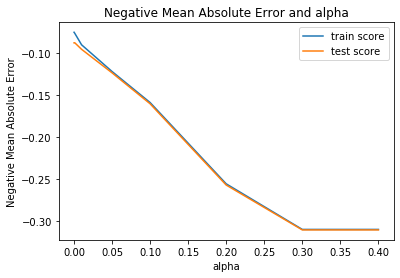

In [121]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### Alpha = 0.001 seems to be the optimal

In [122]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
lasso.coef_

array([ 0.01797112, -0.07113015, -0.02858416,  0.04167278,  0.00525515,
       -0.        ,  0.04280861,  0.00190854,  0.        , -0.00783053,
        0.16239686, -0.02386434,  0.02818581,  0.04251454, -0.02028565,
       -0.00323555, -0.        , -0.02009431, -0.00321313,  0.        ,
        0.05693049,  0.02845241,  0.12178834,  0.08713198,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01825274, -0.0159839 ,  0.01817587,  0.        ,
        0.01816122,  0.        , -0.05744452,  0.        , -0.        ,
       -0.        ,  0.        ,  0.0058658 ,  0.        , -0.00398054,
       -0.        ,  0.        ,  0.32400754,  0.07028404,  0.06830204,
        0.0659253 ,  0.21115969,  0.13958225,  0.16720785, -0.00041942,
        0.01723638, -0.        , -0.00837386,  0.00768687,  0.        ,
        0.00064046, -0.00355295,  0.02082895,  0.0119383 ,  0.        ,
        0.03326158,  0.05006613, -0.02733197,  0.0008772 , -0.02

In [124]:
from sklearn.metrics import r2_score
# predict on train-set
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9284545502602983

#### R2 score on test-set

In [125]:
y_test_pred = ridge.predict(X_test[col2]) #col is the columns selected after applying RFE
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8454162346648599

### Feature Co-efficients

In [126]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

col2 = col2.insert(0, "constant")
sorted(list(zip(model_parameters, col2)))

[(-0.071, 'YearBuilt'),
 (-0.057, 'Condition2_PosN'),
 (-0.029, 'YearRemodAdd'),
 (-0.027, 'BsmtQual'),
 (-0.027, 'ExterQual'),
 (-0.024, 'KitchenAbvGr'),
 (-0.02, 'MSSubClass_160.0'),
 (-0.02, 'MSSubClass_30.0'),
 (-0.016, 'Neighborhood_MeadowV'),
 (-0.008, 'Foundation_CBlock'),
 (-0.008, 'LowQualFinSF'),
 (-0.004, 'Foundation_Wood'),
 (-0.004, 'RoofStyle_Gable'),
 (-0.003, 'MSSubClass_190.0'),
 (-0.003, 'MSSubClass_75.0'),
 (0.0, '2ndFlrSF'),
 (-0.0, 'BldgType_2fmCon'),
 (-0.0, 'BldgType_Duplex'),
 (0.0, 'BldgType_nan'),
 (-0.0, 'BsmtUnfSF'),
 (0.0, 'Condition1_nan'),
 (0.0, 'Condition2_nan'),
 (-0.0, 'Exterior1st_AsphShn'),
 (-0.0, 'Exterior2nd_AsphShn'),
 (0.0, 'Foundation_Slab'),
 (0.0, 'HouseStyle_nan'),
 (0.0, 'LandContour_nan'),
 (0.0, 'LandSlope_nan'),
 (0.0, 'LotConfig_nan'),
 (0.0, 'LotShape_nan'),
 (-0.0, 'MSSubClass_90.0'),
 (0.0, 'MSSubClass_nan'),
 (0.0, 'MSZoning_nan'),
 (0.0, 'Neighborhood_nan'),
 (-0.0, 'RoofStyle_Hip'),
 (0.0, 'RoofStyle_nan'),
 (0.0, 'SaleCondition_